<a href="https://colab.research.google.com/github/JuanMelendres/proyecto_integrador_equipo19/blob/master/Avance1_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance 1. Análisis exploratorio de los datos

##Optimización de flujos quirúrgicos mediante IA

###Oscar Damián Vela Noyola A00821831
###Juan Antonio Melendres Villa A00369017
###Miguel Ángel Villanueva Amador A01793890


#### Librerías

Importamos las librerias que se llegaran a necesitar

In [1]:
# Importación de la librería pandas para la manipulación y análisis de datos
import pandas as pd
# Importación de matplotlib para la creación de gráficos y visualizaciones
import matplotlib.pyplot as plt
# Importación de seaborn para gráficos estadísticos más estéticos (basado en matplotlib)
import seaborn as sns
# Importación de numpy para operaciones matemáticas avanzadas y manejo de arreglos
import numpy as np
# Importación de funciones estadísticas de scipy (por ejemplo, pruebas de hipótesis y estadística inferencial)
from scipy import stats
# Importación de warnings para suprimir advertencias (esto puede ser útil para evitar mensajes innecesarios en la salida)
import warnings
warnings.filterwarnings('ignore')  # Ignorar todas las advertencias

#### Cargar set de datos original

Cargamos el data set original

In [2]:
# Load the data from the first sheet, and assign it to variable "df"
df = pd.read_excel('PQ.xlsx')
# Show the first 10 rows using dataframe.head() method
df.head(10)

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,observaciones,complicaciones30das,var103,obesidad,edadmayor60,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal
0,1,713.0,745957,43,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,0
1,2,899.0,715767,19,2,62.0,160.0,1.60,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1
2,3,1414.0,718835,63,2,60.0,160.0,1.60,23.44,1.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
3,4,1664.0,780065,40,2,71.0,157.0,1.57,28.80,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
4,5,533.0,761613,52,1,73.0,161.0,1.61,28.16,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
5,6,1327.0,718672,27,1,67.0,160.0,1.60,26.17,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,1
6,7,NaN,763027,78,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
7,8,881.0,749454,74,2,71.6,147.0,1.47,33.13,0.0,...,NaN,NaN,NaN,1,1,0,0.0,0,0,1
8,9,1079.0,749394,52,2,89.0,154.0,1.54,37.53,1.0,...,NaN,NaN,NaN,1,0,0,0.0,0,1,1
9,10,1977.0,782561,43,2,60.0,160.0,1.60,23.44,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1


In [3]:
df.shape[0] # CANTIDAD DE RENGLONES

2115

Durante el análisis del conjunto de datos, se llevará a cabo una evaluación exhaustiva para identificar la presencia de valores faltantes en las diferentes columnas. El primer paso consiste en determinar si existen registros incompletos, cuantificando la cantidad de valores ausentes por columna. Esto permitirá tener una visión clara de la magnitud del problema.

Posteriormente, se procederá a analizar los patrones de ausencia, con el fin de identificar si los valores faltantes se distribuyen de manera aleatoria o si siguen alguna tendencia. Para ello, se examinará si los datos ausentes están relacionados con ciertos grupos, categorías o características específicas. Además, se explorarán posibles correlaciones entre las columnas con datos faltantes y otras variables del conjunto de datos, lo que nos podría indicar si existe una relación subyacente que esté influyendo en la ausencia de información.

Este análisis es crucial para decidir la estrategia adecuada a seguir, como la imputación de valores faltantes o la eliminación de registros incompletos, dependiendo de la relevancia de los datos y los patrones identificados.

In [4]:
# Verificar si hay valores faltantes en todo el conjunto de datos
missing_values = df.isnull().sum()

# Filtrar las columnas que contienen valores faltantes
missing_values[missing_values > 0]

,0
num,75
peso,65
tallacm,72
tallam,72
imc,73
...,...
nmeroego,10
observaciones,1894
complicaciones30das,1695
var103,2113


El conjunto de datos tiene valores faltantes en 74 columnas. Algunas de las columnas con un número significativo de valores faltantes incluyen:

  * observaciones: 1894 valores faltantes
  * complicaciones30das: 1695 valores faltantes
  * var103: 2113 valores faltantes
  * num: 75 valores faltantes
  * imc: 73 valores faltantes

Se observa que hay diferentes grados de valores ausentes, con algunas columnas que contienen muchos registros incompletos. Para identificar patrones específicos en las ausencias, se podrían analizar las correlaciones entre las columnas o investigar si los datos faltantes se concentran en ciertos rangos o categorías.

In [5]:
# Comprobación de valores NaN y cálculo del porcentaje de valores faltantes por columna
nan_percentage = df.isna().mean() * 100

# Visualización de las columnas con valores NaN y sus porcentajes
nan_percentage

,0
id,0.000000
num,3.546099
registro,0.000000
edad,0.000000
sexo,0.000000
...,...
hiperglucemia,0.000000
dmdescontrol,0.189125
complicacion,0.000000
bhcanormal,0.000000


Hemos calculado el porcentaje de valores faltantes para cada variable. Algunas de las columnas con valores NaN incluyen:

  * num: 3.55%
  * dmdescontrol: 0.19%

El resto de las columnas tienen porcentajes de valores faltantes menores o son del 0%.

In [6]:
# Filtrar columnas que tengan más de un cierto umbral de valores NaN, digamos 50 % por ahora
threshold = 50
columns_to_drop = nan_percentage[nan_percentage > threshold].index

# Mostrar las columnas que tienen más del 50% de valores NaN
columns_to_drop

Index(['DM controlada', 'htacontrol', 'tipoenfermedadcoronaria',
       'cuales_antecedentes', 'goldman_detsky', 'tipocomplic_transqx',
       'tipocomplic_postqx', 'trigliceridos', 'colesterol', 'glucosuria',
       'egoinfeccin', 'egoanormal', 'motivorepeticin', 'cualesadicionales',
       'tipotxanormales', 'observaciones', 'complicaciones30das', 'var103'],
      dtype='object')

Las siguientes columnas tienen más del 50% de valores faltantes (NaN) y podrían ser consideradas para su eliminación:

  * DM controlada
  * htacontrol
  * tipoenfermedadcoronaria
  * cuales_antecedentes
  * goldman_detsky
  * tipocomplic_transqx
  * tipocomplic_postqx
  * trigliceridos
  * colesterol
  * glucosuria
  * egoinfeccin
  * egoanormal
  * motivorepeticin
  * cualesadicionales
  * tipotxanormales
  * observaciones
  * complicaciones30das
  * var103

In [7]:
# Eliminamos las columnas que tienen más del 50% de valores faltantes (NaN)
cleaned_data = df.drop(columns=columns_to_drop)

# Mostramos el DataFrame limpio
cleaned_data.head(10)

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,nmeroego,urgencia,inestable,obesidad,edadmayor60,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal
0,1,713.0,745957,43,1,70.0,170.0,1.70,24.22,0.0,...,1,0,0,0,0,0,0.0,0,0,0
1,2,899.0,715767,19,2,62.0,160.0,1.60,24.22,0.0,...,1,0,0,0,0,0,0.0,0,0,1
2,3,1414.0,718835,63,2,60.0,160.0,1.60,23.44,1.0,...,0,0,0,0,1,0,0.0,0,1,1
3,4,1664.0,780065,40,2,71.0,157.0,1.57,28.80,0.0,...,0,0,0,0,0,0,0.0,0,1,0
4,5,533.0,761613,52,1,73.0,161.0,1.61,28.16,0.0,...,2,0,0,0,0,0,0.0,0,1,0
5,6,1327.0,718672,27,1,67.0,160.0,1.60,26.17,0.0,...,0,1,0,0,0,0,0.0,0,1,1
6,7,NaN,763027,78,1,70.0,170.0,1.70,24.22,0.0,...,1,0,0,0,1,0,0.0,0,1,1
7,8,881.0,749454,74,2,71.6,147.0,1.47,33.13,0.0,...,1,0,0,1,1,0,0.0,0,0,1
8,9,1079.0,749394,52,2,89.0,154.0,1.54,37.53,1.0,...,1,0,0,1,0,0,0.0,0,1,1
9,10,1977.0,782561,43,2,60.0,160.0,1.60,23.44,0.0,...,1,1,0,0,0,0,0.0,0,0,1


In [8]:
# Mostramos tamaño del DataFrame
cleaned_data.shape

(2115, 89)

Generamos las estadísticas descriptivas para el conjunto de datos limpio. Incluyen medidas como la media, la desviación estándar, los valores mínimos y máximos, así como los cuartiles.

In [9]:
cleaned_data.describe()

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,algunanormal,urgencia,inestable,obesidad,edadmayor60,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal
count,2115.000000,2040.000000,2.115000e+03,2115.000000,2115.000000,2050.000000,2043.00000,2043.000000,2042.000000,2111.000000,...,2109.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2111.000000,2115.000000,2115.000000,2115.000000
mean,1085.368794,1142.085294,7.198978e+05,50.686525,1.488416,71.806141,161.99535,1.619953,27.368663,0.186641,...,0.834993,0.238771,0.012293,0.266667,0.342317,0.136643,0.070583,0.032624,0.513948,0.600473
std,625.943213,642.336103,1.628680e+05,18.208417,0.499984,15.950071,8.84905,0.088490,5.719734,0.389716,...,0.371275,0.426433,0.110217,0.442321,0.474597,0.343551,0.256187,0.177693,0.499924,0.489917
min,1.000000,1.000000,1.510000e+03,18.000000,1.000000,24.000000,133.00000,1.330000,8.110000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,544.500000,591.750000,7.162395e+05,36.000000,1.000000,61.000000,156.00000,1.560000,23.940000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1083.000000,1152.500000,7.416980e+05,51.000000,1.000000,70.000000,162.00000,1.620000,26.160000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1626.500000,1692.250000,7.651770e+05,65.000000,2.000000,79.575000,170.00000,1.700000,29.662500,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2166.000000,2208.000000,7.000000e+06,99.000000,2.000000,209.000000,190.00000,1.900000,71.760000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


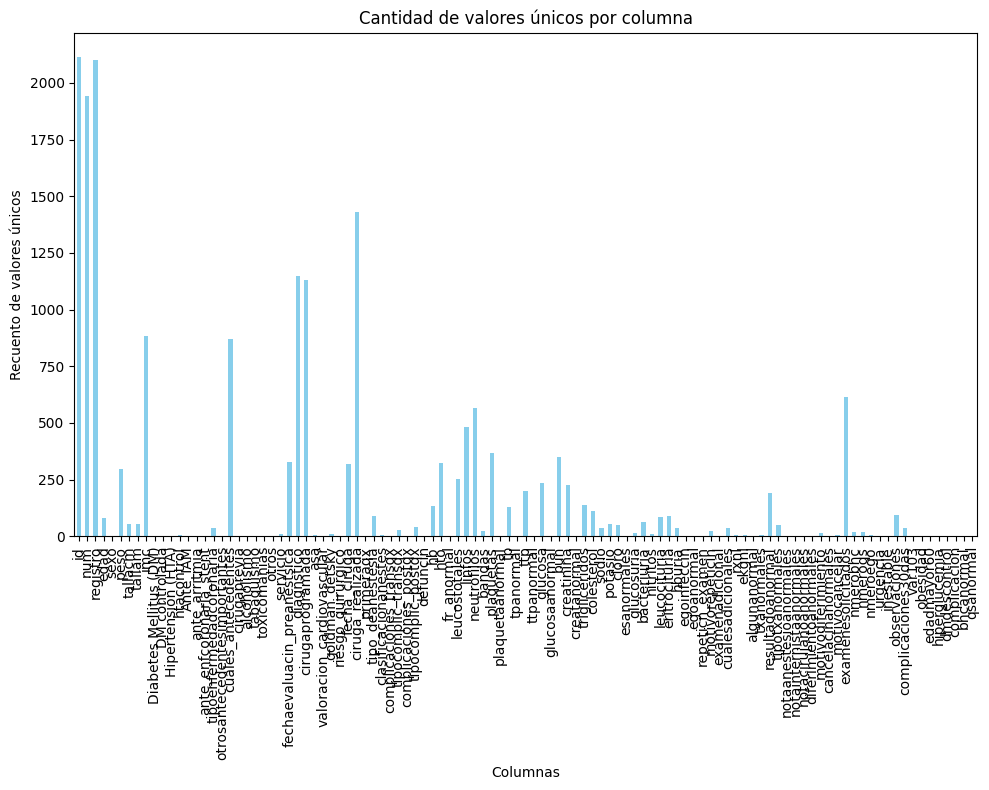

In [10]:
# Aplicamos nunique() a todas las columnas para ver la cantidad de valores únicos en cada una
unique_values = df.nunique()

# Graficamos la cantidad de valores únicos para cada columna
plt.figure(figsize=(10, 8))
unique_values.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores únicos por columna')
plt.ylabel('Recuento de valores únicos')
plt.xlabel('Columnas')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Esta gráfica que muestra el número de valores únicos por columna

In [11]:
# Calcular el porcentaje de valores únicos para cada columna
unique_percentage = (df.nunique() / len(df)) * 100

# Mostrar el resultado
unique_percentage_sorted = unique_percentage.sort_values(ascending=False)

# Mostrar las 10 columnas principales con el mayor porcentaje de valores únicos
unique_percentage_sorted.head(10)

,0
id,100.000000
registro,99.338061
num,91.867612
ciruga_realizada,67.565012
diagnstico,54.231678
cirugaprogramada,53.522459
imc,41.796690
cuales_antecedentes,41.182033
examenesolicitados,29.030733
neutrofilos,26.713948


El porcentaje de valores únicos en cada columna varía. Estas son las 10 columnas con los porcentajes más altos de valores únicos:

  * id: 100%
  * registro: 99.34%
  * num: 91.87%
  * cirugía realizada: 67.57%
  * diagnóstico: 54.23%
  * cirugía programada: 53.52%
  * imc: 41.80%
  * cuales antecedentes: 41.18%
  * examen solicitado: 29.03%
  * neutrófilos: 26.71%

#### Separación de variables

En el proceso de preparación y limpieza del conjunto de datos, se ha llevado a cabo una separación de los distintos tipos de variables de entrada, con el objetivo de optimizar el análisis y evitar redundancias en la información.

En particular, algunas variables han sido ignoradas debido a que contienen información duplicada o equivalente a otras variables ya presentes en el conjunto de datos:

  * DM controlada ha sido ignorada, ya que esta variable es redundante con la variable Diabetes Mellitus (DM), que abarca de manera más general el estado de la diabetes en los pacientes.

  * htacontrol también se ha excluido del análisis, ya que su contenido es equivalente al de Hipertensión (HTA), una variable que ya recoge de forma más amplia la presencia o ausencia de hipertensión en los pacientes.

  * ante_enfcoronaria_stent se ha descartado, ya que esta variable proporciona información duplicada con respecto a tipoenfermedadcoronaria, que ya describe de manera detallada la presencia de enfermedad coronaria, incluyendo el uso de stents en los pacientes.

Este enfoque de limpieza y consolidación de las variables permite reducir la redundancia y mejora la eficiencia del análisis, al enfocarse únicamente en aquellas variables que aportan información nueva o relevante para el estudio.

In [12]:
cat_vars_entrada = ["tipoenfermedadcoronaria", "cuales_antecedentes", "sexo", "diagnstico", "cirugaprogramada",
            "clasificacionanestes", "tipocomplic_transqx", "tipocomplic_postqx", "bacteriuria",
            "nitritos", "leucocituria", "eritrocituria", "hburia", "egoinfeccin", "egoanormal"]

num_vars_entrada = ["edad", "peso", "tallacm", "tallam", "imc", "hb", "hto","leucostotales",
            "linfos", "neutrofilos", "bandas", "plaquetas", "tp", "ttp", "glucosa", "bun",
            "creatinina", "colesterol", "sodio", "potasio", "cloro"]

binary_vars_entrada = ["Diabetes Mellitus (DM)", "Hipertensión (HTA)",
               "Ante_IAM", "ante_arritmia", "otrosantecedentesimportantes",
               "cirugaprevia", "alcoholismo", "tabaquismo", "otros", "valoracion_cardiovascular",
               "primeraqx", "fr_anormal", "plaquetaanormal", "tpanormal", "ttpanormal", "glucosaanormal",
               "creatanormal", "esanormales", "repeticn_examen", "obesidad", "hiperglucemia",
               "bhcanormal", "qsanormal"]

Se organizan las variables de salida del conjunto de datos en dos grupos, dependiendo de su naturaleza:

1. **Variables categóricas** (`cat_vars_salida`): Estas son variables que pueden tomar varios valores discretos o categorías, y no siguen un orden inherente. En este caso, se identifican tres variables categóricas relacionadas con la salida del modelo:
   - **cualesadicionales**: Se refiere a información adicional específica que puede tener diversas categorías.
   - **resultadoanormal**: Indica resultados que no son normales, categorizados en diferentes tipos.
   - **examenesolicitados**: Se refiere a los exámenes o pruebas solicitadas, que también pueden tener múltiples categorías.

2. **Variables numéricas** (`num_vars_entrada`): son aquellas que representan valores cuantitativos y se expresan mediante números. Estas variables permiten realizar operaciones matemáticas como sumas, restas, promedios, etc. Dentro de los datos proporcionados, las variables numéricas pueden ser de tipo entero o decimal, y a menudo reflejan medidas o cantidades como edad, peso, niveles de laboratorio, entre otros. Estas variables proporcionan información cuantificable y se utilizan para analizar y correlacionar los datos del paciente de manera estadística y médica.

2. **Variables binarias** (`binary_vars_salida`): Estas son variables que pueden tomar uno de dos valores posibles, generalmente representando la presencia o ausencia de una característica o evento. Aquí se incluyen cuatro variables binarias:
   - **defuncin**: Indica si ocurrió una defunción (sí o no).
   - **complicaciones_transqx**: Se refiere a la presencia o ausencia de complicaciones durante la cirugía (transoperatorias).
   - **complicaciones_postqx**: Señala si hubo complicaciones después de la cirugía (postoperatorias).
   - **complicaciones30das**: Indica si ocurrieron complicaciones dentro de los primeros 30 días después de la cirugía.

Este enfoque de clasificación permite un tratamiento adecuado de las variables durante el análisis o el modelado, según sus características (categóricas o binarias).

In [13]:
binary_vars_salida = ["riesgo_quirurgico"]

El código binary_vars_salida = ["riesgo_quirurgico"] está creando una lista llamada binary_vars_salida que contiene el nombre de una variable o columna, en este caso "riesgo_quirurgico". Esta columna probablemente representa una variable categórica binaria, es decir, una variable que toma solo dos posibles valores (como 1, 2 y 3).

En resumen, este código prepara la columna riesgo_quirurgico para algún análisis o procesamiento, posiblemente relacionado con una clasificación binaria o una salida de un modelo que se basa en esta variable.

####VARIABLES CATEGÓRICAS

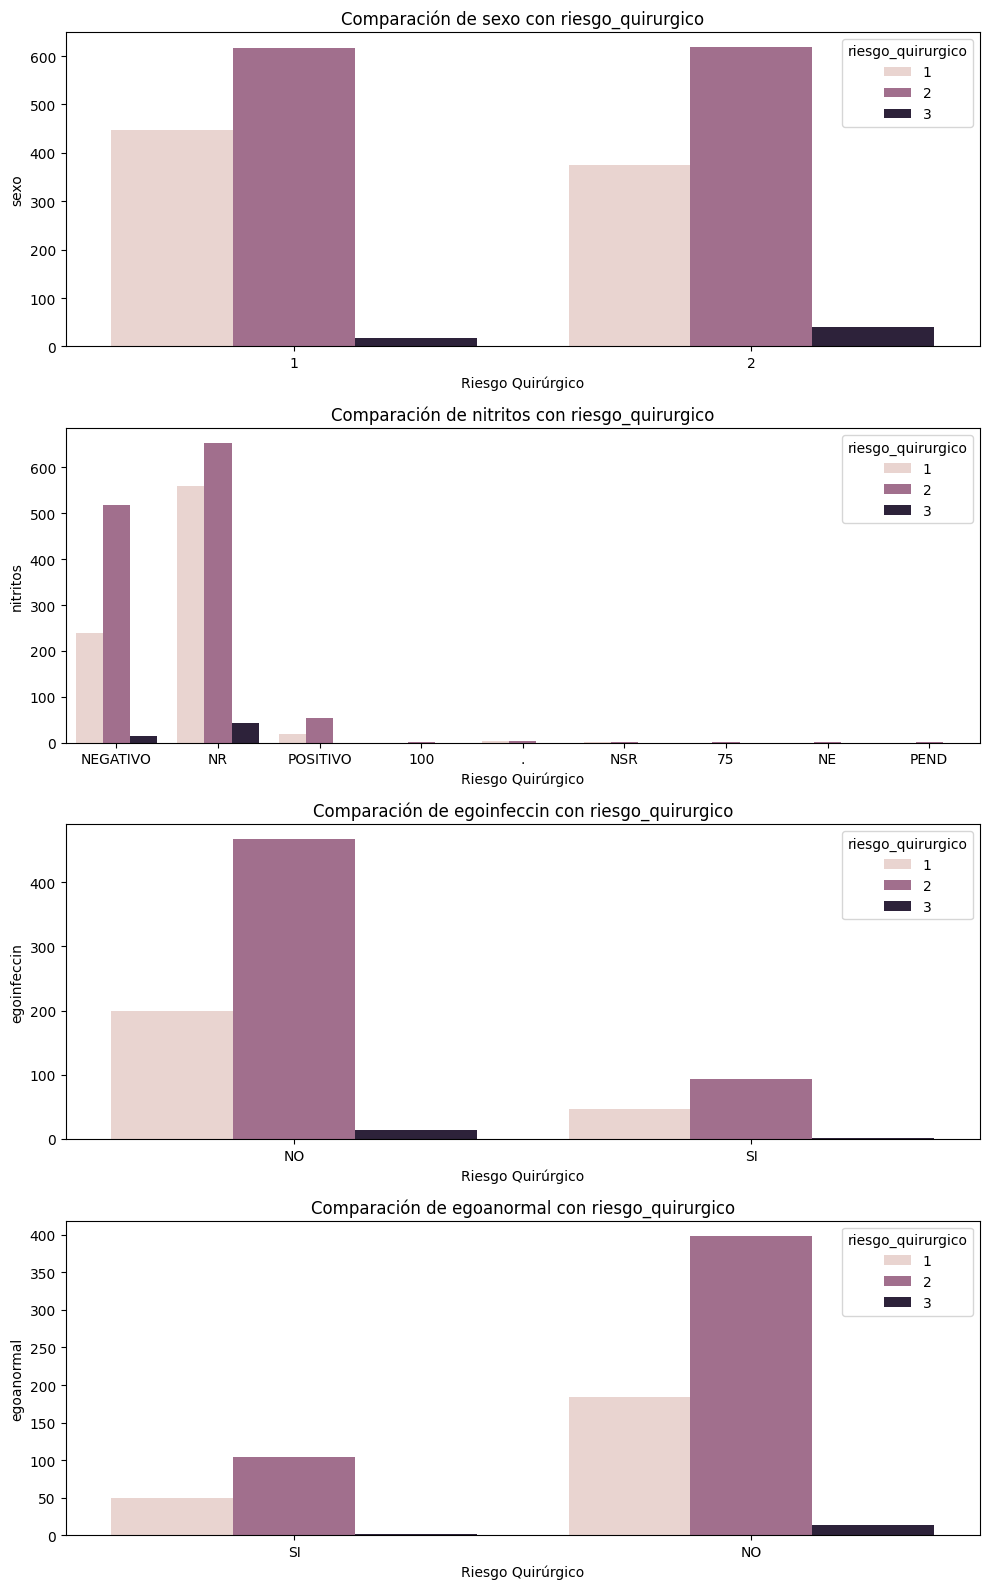

In [14]:
# Ahora vamos a crear gráficos de comparación entre 'riesgo' y las variables categóricas

# Creación de un conjunto de gráficos de comparación para variables categóricas
# mostraremos las variables categóricas más relevantes
categoricas_vars_entrada = ["sexo", "nitritos", "egoinfeccin", "egoanormal"]
fig, axes = plt.subplots(len(categoricas_vars_entrada), 1, figsize=(10, len(categoricas_vars_entrada)*4))
for i, var in enumerate(categoricas_vars_entrada):
    sns.countplot(x=var, hue='riesgo_quirurgico', data=df, ax=axes[i])
    axes[i].set_title(f'Comparación de {var} con riesgo_quirurgico')
    axes[i].set_xlabel('Riesgo Quirúrgico')
    axes[i].set_ylabel(var)
plt.tight_layout()

plt.show()

Se genera un conjunto de gráficos de comparación para visualizar la relación entre la variable binaria riesgo_quirurgico y varias variables categóricas de interés.

Para analizar visualmente cómo las variables categóricas (como el sexo o indicadores de infecciones) se relacionan con el riesgo quirúrgico. Cada gráfico muestra la cantidad de observaciones en cada categoría de la variable seleccionada, diferenciadas por si el paciente tiene alto o bajo riesgo quirúrgico.

Para determinar si hay correlaciones significativas entre las variables, debemos calcular los valores p asociados a las correlaciones. Un valor p bajo (generalmente menos de 0.05) indicaría que la correlación observada es estadísticamente significativa y no es producto del azar.

Realizaremos un análisis más detallado y calcular los valores p de las correlaciones entre las variables para identificar las correlaciones significativas.

In [15]:
# Función para analizar cada columna categórica
def analizar_categorica(col):
    """
    Esta función analiza una columna categórica y devuelve:
    1. Los tres valores más frecuentes (Top 3).
    2. El número de datos nulos.
    3. La cardinalidad (número de valores únicos).
    4. El valor más largo en cuanto a número de caracteres (ignorando nulos).
    """

    # Obtener los 3 valores más frecuentes
    top_3 = col.value_counts().nlargest(3)

    # Contar los valores nulos
    nulos = col.isna().sum()

    # Obtener la cardinalidad (número de valores únicos)
    cardinalidad = col.nunique()

    # Obtener el dato más largo en cuanto a número de caracteres (omitimos nulos)
    if not col.dropna().empty:  # Verificar si la columna no está vacía
        dato_mas_largo_idx = col.dropna().astype(str).map(len).idxmax()
        dato_mas_largo_valor = col[dato_mas_largo_idx]
    else:
        dato_mas_largo_valor = "Sin datos"

    return top_3, nulos, cardinalidad, dato_mas_largo_valor

In [16]:
# Diccionario para almacenar los resultados de cada columna
resultados = {}

# Iterar sobre cada columna categórica
for var in cat_vars_entrada:
    top_3, nulos, cardinalidad, dato_mas_largo_valor = analizar_categorica(df[var])
    resultados[var] = {
        'Top 3 más frecuentes': top_3,
        'Datos nulos': nulos,
        'Cardinalidad': cardinalidad,
        'Dato más largo': dato_mas_largo_valor
    }

In [17]:
# Mostrar los resultados de manera legible
for var, info in resultados.items():
    print(f"\n{'-'*50}")
    print(f"Análisis de la columna: {var}")
    print(f"{'-'*50}")
    print(f"Top 3 valores más frecuentes:\n{info['Top 3 más frecuentes']}")
    print(f"\nDatos Nulos: {info['Datos nulos']}")
    print(f"Cardinalidad (valores únicos): {info['Cardinalidad']}")
    print(f"Dato más largo: {info['Dato más largo']}")
    print(f"{'-'*50}\n")


--------------------------------------------------
Análisis de la columna: tipoenfermedadcoronaria
--------------------------------------------------
Top 3 valores más frecuentes:
tipoenfermedadcoronaria
.                                                                 4
NO ESPECIFICADA                                                   2
CATETERISMO CARDIACO EN EL 2004 POR INFARTO AGUDO AL MIOCRADIO    1
Name: count, dtype: int64

Datos Nulos: 2075
Cardinalidad (valores únicos): 36
Dato más largo: CATETERISMO CARDIACO HACE 5 AÑOS (DESCONOCE LA CAUSA) + RECAMBIO VALVULAR MECANICO (AORTICO Y MITRAL) EN TRATAMIENTO CON ACENOCUMARINA
--------------------------------------------------


--------------------------------------------------
Análisis de la columna: cuales_antecedentes
--------------------------------------------------
Top 3 valores más frecuentes:
cuales_antecedentes
TABAQUISMO          57
HIPOTIROIDISMO      18
CIRUGÍAS PREVIAS    17
Name: count, dtype: int64

Datos Nulos: 108

El resultado es un análisis detallado de las columnas categóricas que has especificado en cat_vars_entrada. El código presenta, para cada columna categórica, un resumen con los siguientes puntos clave:

  * Top 3 valores más frecuentes: Muestra los tres valores más comunes en la columna, junto con la cantidad de veces que aparecen. Esto te permite identificar las categorías dominantes.

  * Datos nulos: Muestra el número de valores nulos o faltantes en la columna, lo cual es importante para evaluar la calidad de los datos y si se necesita imputar o eliminar registros.

  * Cardinalidad (valores únicos): Indica cuántos valores únicos tiene la columna. Esto es útil para entender la diversidad de los datos en esa variable. Por ejemplo, una columna con alta cardinalidad podría contener muchas categorías diferentes, mientras que una columna con baja cardinalidad podría tener solo unas pocas opciones.

  * Dato más largo: Muestra el valor que tiene más caracteres en la columna. Esto es útil para verificar si hay datos con longitudes inesperadas o que podrían requerir limpieza (por ejemplo, si un valor es anormalmente largo en comparación con otros).

Con los resultados obtenidos podemos decir que:

*   tipoenfermedadcoronaria: Se recomienda o quitar o hacer variable binaria. Tiene 98.1% de datos nulos y una cardinalidad de 36 (tiene mucha descripción para los pacientes que sí tienen alguna enfermedad).
*   cuales_antecedentes: tiene 51.2% de datos nulos y una cardinalidad de 871. Sin embargo, es porque cada celda tiene una lista de los antecedentes;
pensamos que puede ser útil conservarla pero haciendo unos cambios (clasificar en temas los antecedentes) y registrar si la persona tiene alguno convirtiéndola en varias columnas binarias (de los temas).
*   sexo: no tiene valores nulos, tiene 1 para masculino y 2 para femenino y los datos están balanceados.
*   diagnstico: tiene tan solo un valor nulo, representa el mismo problema que cuales_antecedentes. Podemos usarla separándola en temas.
*   cirugiaprogramada: no tiene datos nulos, tiene muchas descripciones que se puede hacer un regex para determinar el tema; sin embargo, recomendaría usar o el diagnóstico o la cirugía programada para no aumentar la cantidad de columnas y dado que ambas columnas representan casi lo mismo.
*   clasificacionanestes: representa con qué anestesia se hizo la cirugía.La cardinalidad es de 5, no tiene datos nulos. Esta columna se puede usar.
*   tipocomplic_transqx: podemos convertirla en un dato binario de si hubo o no complicaciones, el 98.67% son datos nulos; se recomienda mejor borrarla, puede no aportar mucho, hay otras columnas que contienen la misma información. Lo mismo para la complicación post.
*   nitritos: tiene solo 2 datos nulos; la cardinalidad es de 9. Podemos estandarizar más esta columna para tener solo 3 opciones, porque el resto de los valores que no son NR, POSITIVO o NEGATIVO son o números o ".", lo mismo para leucocituria o hburia.
*   egoinfeccin: cambiar a binario; la cardinalidad es de 2 ("SI", "NO").

#### VARIABLES NUMÉRICAS

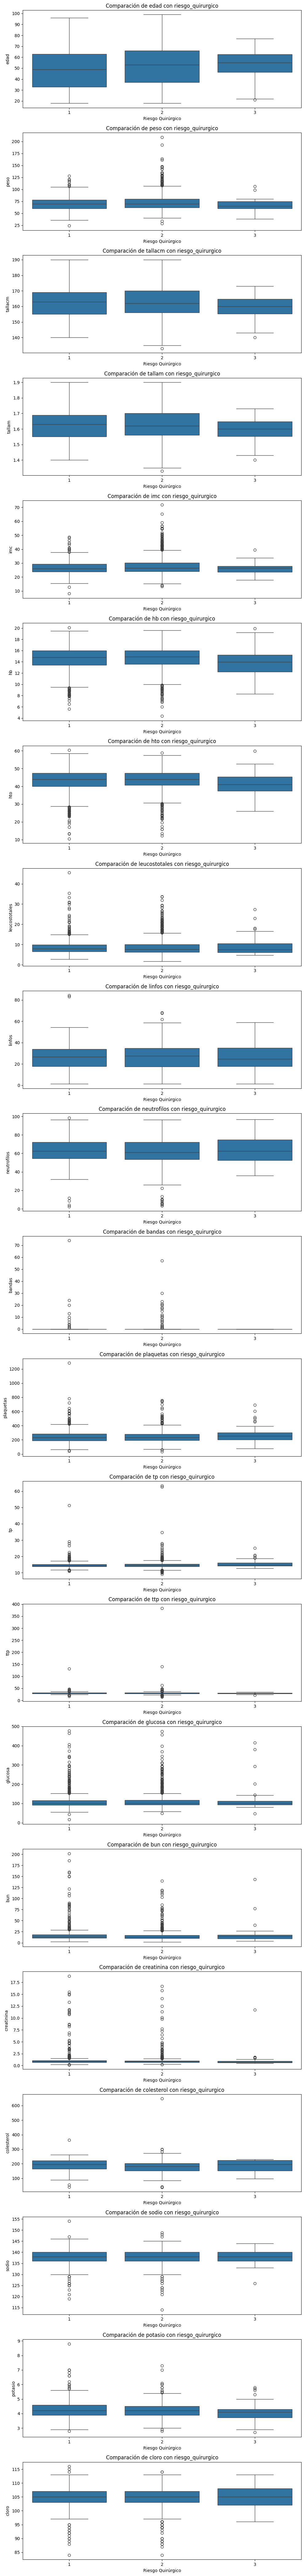

In [18]:
# Creamos gráficos de comparación entre 'riesgo' y las variables numéricas
# Creación de un conjunto de gráficos de comparación para variables numéricas
fig, axes2 = plt.subplots(len(num_vars_entrada), 1, figsize=(10, len(num_vars_entrada)*4))
for i, var in enumerate(num_vars_entrada):
    sns.boxplot(x='riesgo_quirurgico', y=var, data=df, ax=axes2[i])
    axes2[i].set_title(f'Comparación de {var} con riesgo_quirurgico')
    axes2[i].set_xlabel('Riesgo Quirúrgico')
    axes2[i].set_ylabel(var)
plt.tight_layout()

Genera un conjunto de gráficos de caja ("boxplots") para comparar las variables numéricas especificadas en num_vars_entrada con la variable categórica riesgo_quirurgico. Aquí está la descripción del resultado:

Comparamos las variables numéricas como edad, colesterol, y presion_sanguinea con el riesgo_quirurgico. El resultado serían tres gráficos de caja, uno para cada variable numérica:

  * Edad vs. Riesgo Quirúrgico: El gráfico de caja mostraría la distribución de edades para cada categoría de riesgo quirúrgico. Si los pacientes con mayor riesgo tienen una edad más avanzada, se vería reflejado con una mediana más alta para los grupos de riesgo alto.

  * Colesterol vs. Riesgo Quirúrgico: Un gráfico similar podría mostrar si los niveles de colesterol tienden a ser más altos en los pacientes con mayor riesgo quirúrgico.

  * Presión sanguínea vs. Riesgo Quirúrgico: De manera similar, podrías observar si los valores de presión sanguínea son más altos en pacientes con mayor riesgo quirúrgico.

¿Qué información obtenemos de los gráficos de caja?

  * Mediana: La línea dentro de la caja muestra la mediana de la variable numérica para cada categoría de riesgo_quirurgico.

  * Rango intercuartil (IQR): La caja muestra el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3), lo que te permite ver la dispersión de la mayoría de los datos.

  * Valores atípicos: Los puntos fuera de los "bigotes" del gráfico de caja representan valores atípicos, lo que puede indicar casos extremos que valdría la pena investigar más a fondo.

  * Comparación entre grupos: Si las cajas para diferentes niveles de riesgo_quirurgico tienen posiciones o tamaños diferentes, eso sugiere que la variable numérica está correlacionada con el riesgo quirúrgico.

Este tipo de visualización te permite detectar de manera rápida si existen diferencias significativas entre los grupos definidos por riesgo_quirurgico para cada una de las variables numéricas.

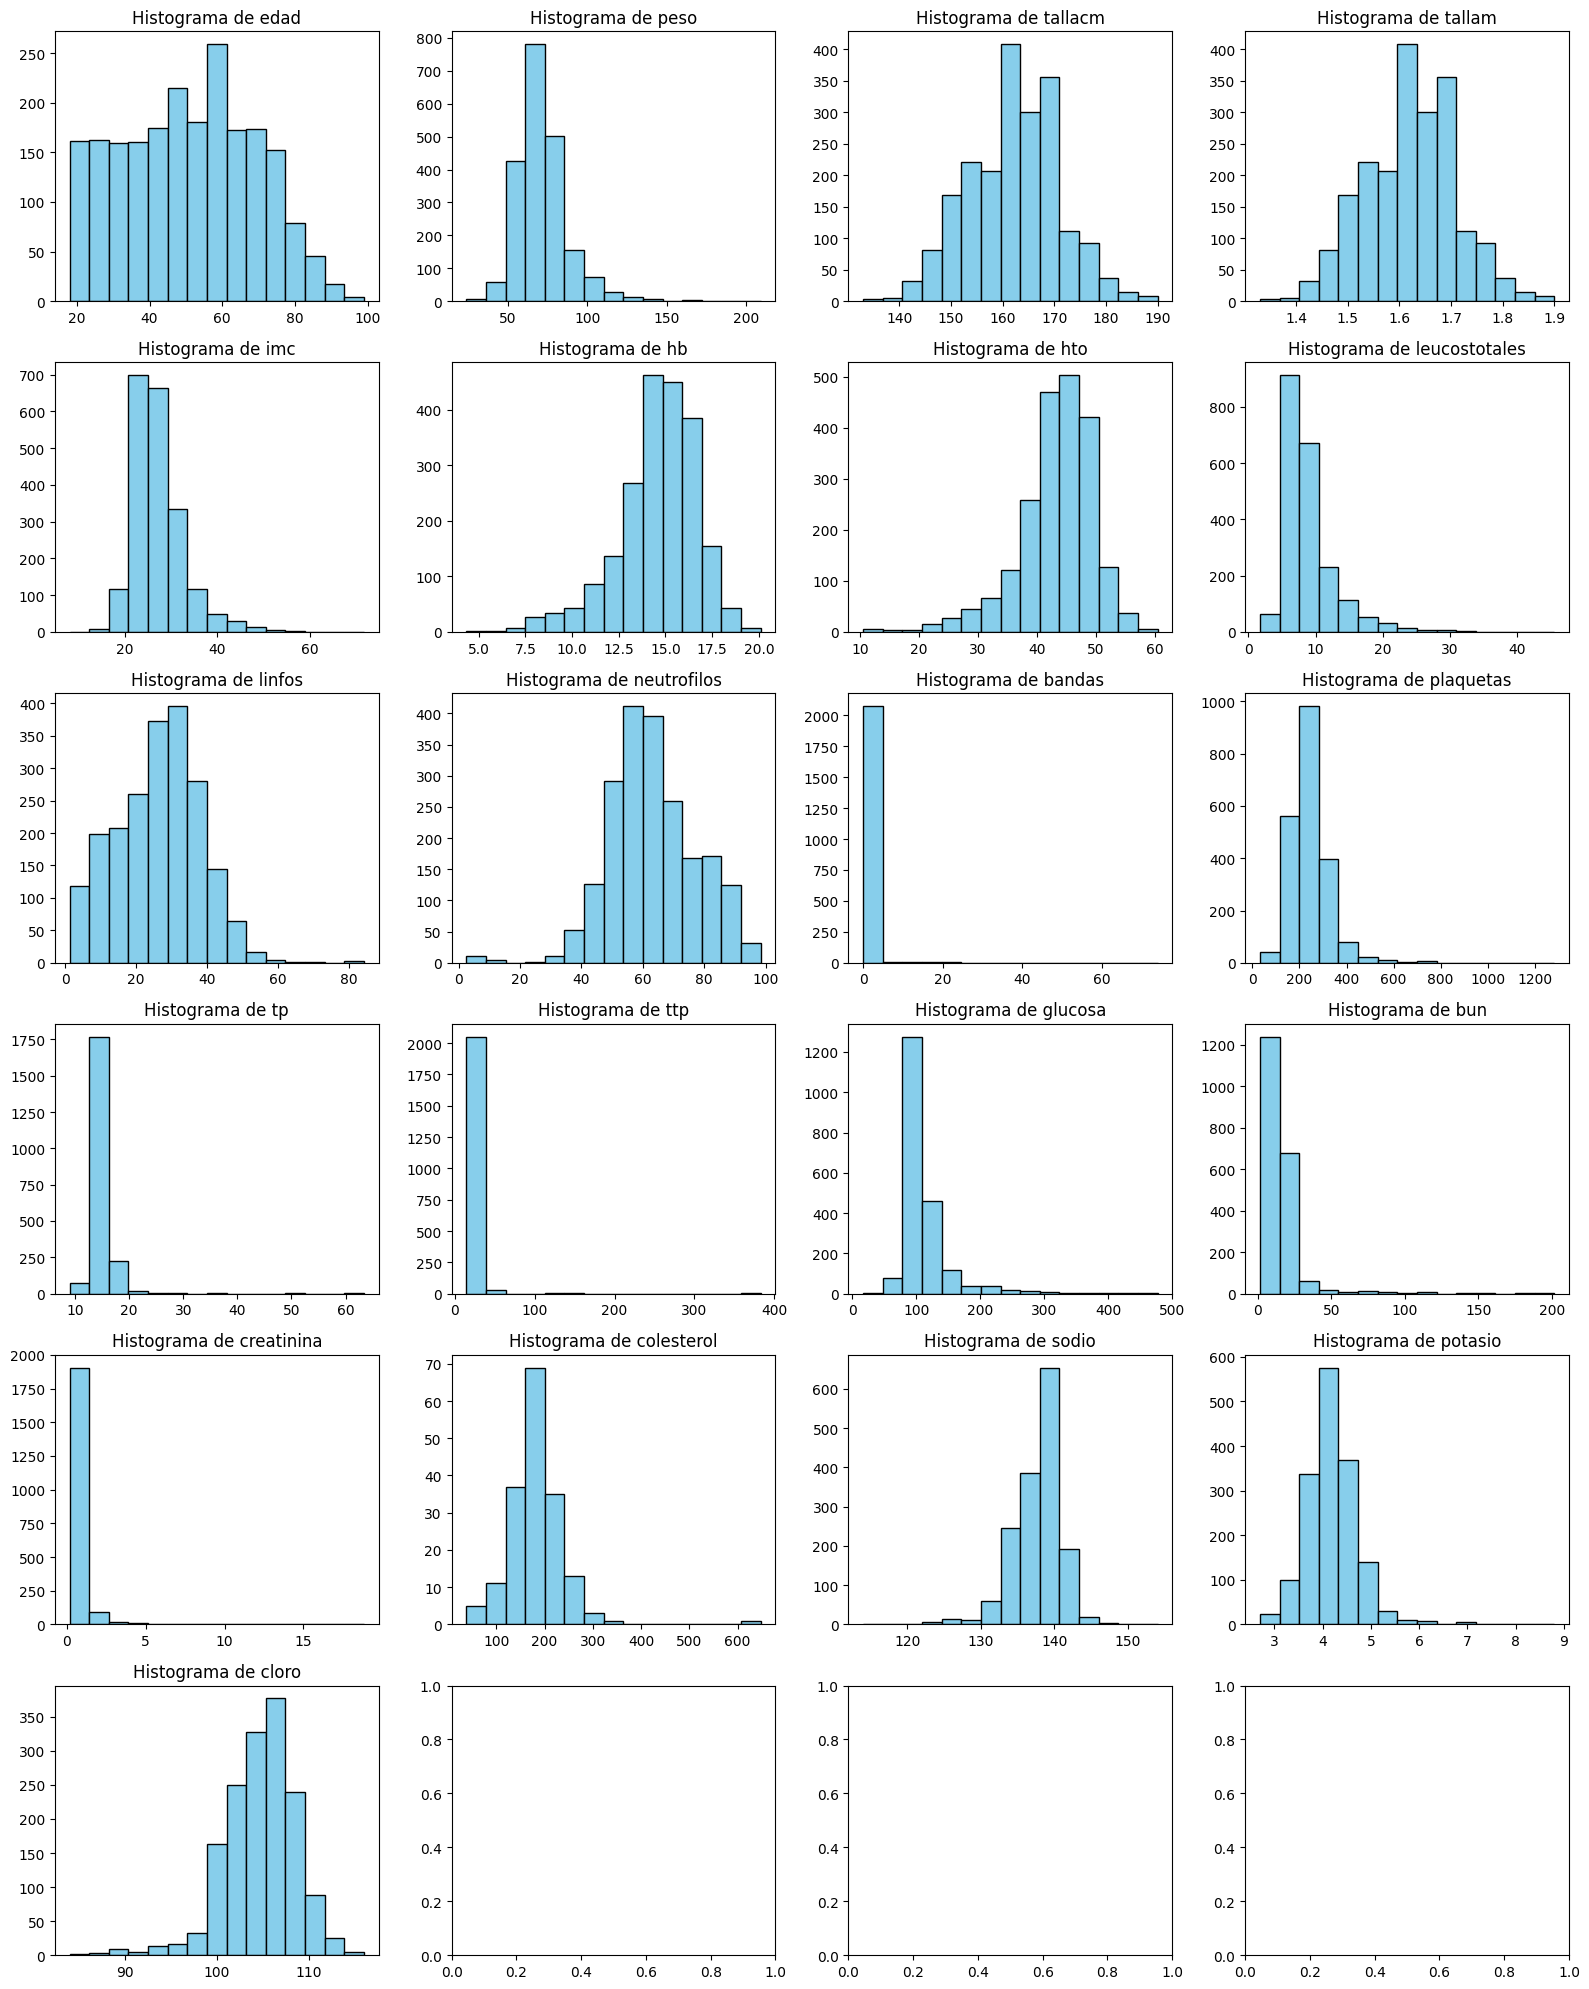

In [19]:
# Crear subplots para los histogramas
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))
axs = axs.flatten()

# Diccionario para almacenar las estadísticas resumidas
estadisticas_resumidas = {}

for i, var in enumerate(num_vars_entrada):
    col_data = df[var].dropna()  # Eliminar los valores NaN

    # Histograma
    axs[i].hist(col_data, bins=15, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {var}')

    # Estadísticas resumidas
    media = col_data.mean()
    mediana = col_data.median()
    std = col_data.std()
    varianza = col_data.var()
    kurtosis = col_data.kurtosis()

    # Detectar datos atípicos usando el método IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = col_data[(col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR))].count()

    # Guardar estadísticas en el diccionario
    estadisticas_resumidas[var] = {
        'Media': media,
        'Mediana': mediana,
        'Desviación Estándar': std,
        'Varianza': varianza,
        'Kurtosis': kurtosis,
        'Outliers (Atípicos)': outliers
    }

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

*   Con la información que se presenta en los histogramas, para los que están sesgados se le puede hacer una transformación Box-Cox o logarítmica: peso, imc, hb, hto, leucostales, plaquetas, linfos, trigliceridos y neutrofilos.
*   La creatinina y glucosuria tienen aspecto de no aportar mucha información y a simple vista se puede ver que tienen datos atípicos.
*   Los que no se mencionaron están bien y puede hacerse una transformación de raíz cuadrada y ajustar que queden entre -1 y 1.

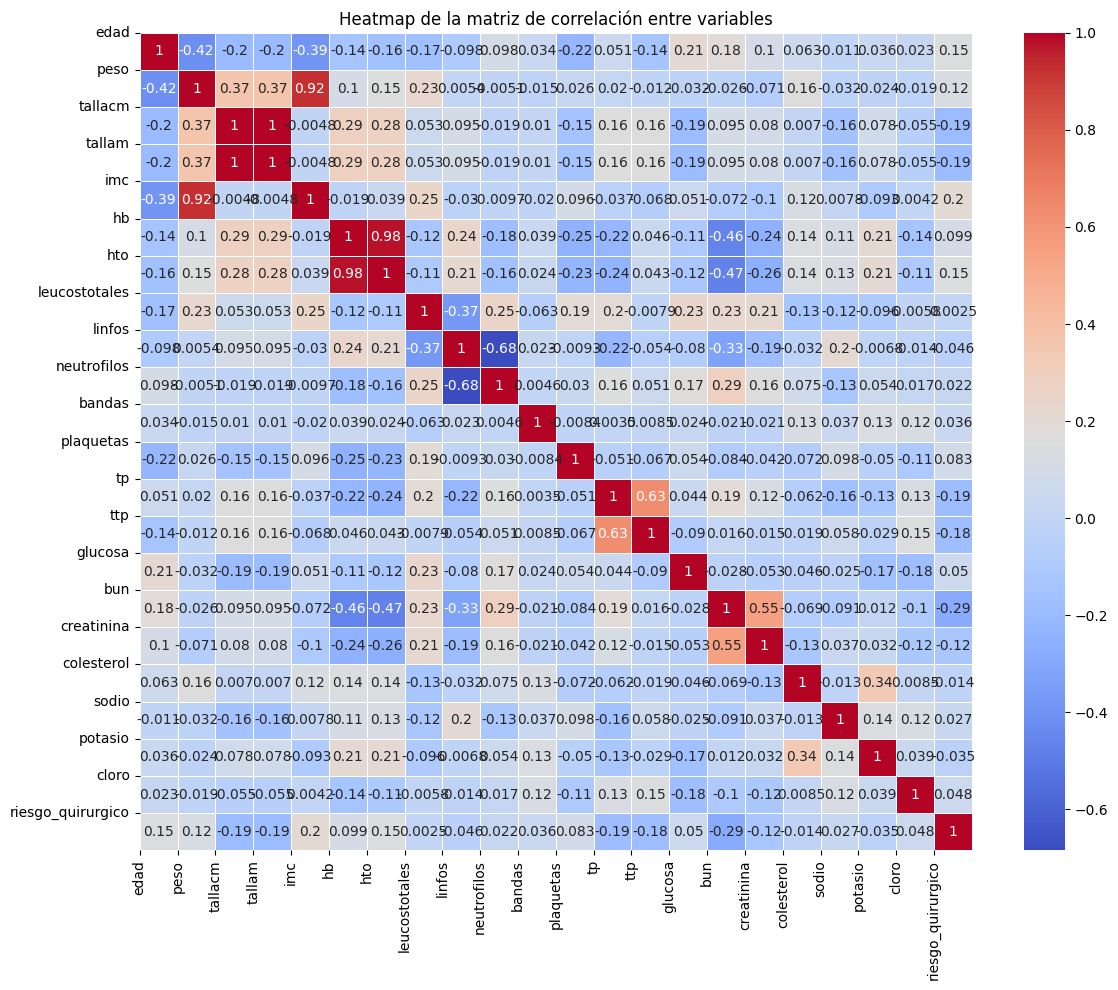

In [20]:
# Revisar si 'riesgo_quirurgico' es categórica o numérica
df['riesgo_quirurgico'] = pd.to_numeric(df['riesgo_quirurgico'], errors='coerce')

# Filtrar las columnas numéricas incluyendo 'riesgo_quirurgico'
num_vars_present = [col for col in num_vars_entrada if col in df.columns]
num_vars_present.append('riesgo_quirurgico')
numerical_data = df[num_vars_present].dropna()

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Ahora, generar el heatmap
plt.figure(figsize=(12, 10))

# Generar un heatmap para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir etiquetas
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Añadir un título
plt.title('Heatmap de la matriz de correlación entre variables')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

La matriz de correlación entre las variables numéricas, incluyendo "riesgo_quirúrgico". Esta matriz nos permite observar qué tan fuerte es la relación entre diferentes variables.

Algunos puntos clave que podrías observar:

  * Las correlaciones cercanas a 1 o -1 indican una relación fuerte (positiva o negativa, respectivamente) entre las variables.
  
  * Las correlaciones cercanas a 0 indican que no existe una relación lineal fuerte entre las variables.

Por ejemplo, puedemos ver que:

  * El "peso" tiene una correlación positiva moderada con el "riesgo_quirúrgico" (0.139), lo que indica que podría estar relacionado con un mayor riesgo quirúrgico.

  * El "IMC" también tiene una correlación positiva (0.155) con "riesgo_quirúrgico", lo que sugiere una relación leve entre un mayor índice de masa corporal y un mayor riesgo.

In [21]:
# Función para calcular la matriz de correlación con valores p
def correlation_with_pvalues(data):
    cols = data.columns
    pvalues_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for i in range(len(cols)):
        for j in range(i, len(cols)):
            if i == j:
                corr_matrix.iloc[i, j] = 1.0
                pvalues_matrix.iloc[i, j] = 0.0
            else:
                corr, pvalue = stats.pearsonr(data[cols[i]], data[cols[j]])
                corr_matrix.iloc[i, j] = corr
                corr_matrix.iloc[j, i] = corr
                pvalues_matrix.iloc[i, j] = pvalue
                pvalues_matrix.iloc[j, i] = pvalue

    return corr_matrix, pvalues_matrix

# Calculating correlation and p-value matrices
corr_matrix, pvalues_matrix = correlation_with_pvalues(numerical_data)

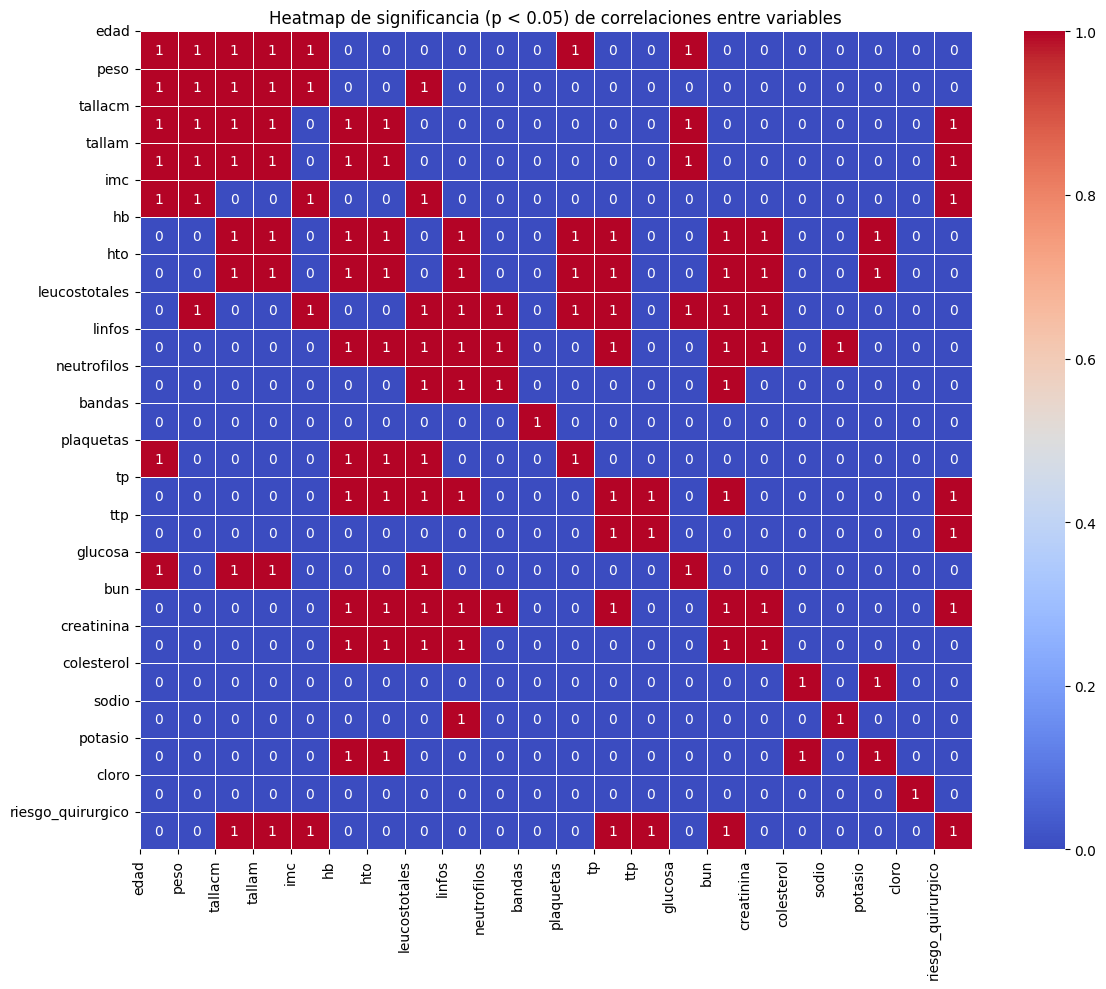

In [22]:
# Crear un heatmap con los valores p, resaltando aquellos que son significativos (p < 0.05)
plt.figure(figsize=(12, 10))

# Generar un heatmap con los p-values
sns.heatmap(pvalues_matrix< 0.05, annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir etiquetas
plt.xticks(np.arange(len(pvalues_matrix.columns)), pvalues_matrix.columns, rotation=90)
plt.yticks(np.arange(len(pvalues_matrix.index)), pvalues_matrix.index)

# Añadir un título
plt.title('Heatmap de significancia (p < 0.05) de correlaciones entre variables')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


La matriz de valores p que acompaña a las correlaciones. Estos valores p te permiten identificar cuáles de las correlaciones entre las variables son estadísticamente significativas. En general:

  * Un valor p menor a 0.05 indica que la correlación es significativa. Valores p mayores a 0.05 indican que la correlación no es significativa, es decir, que podría haber surgido por azar.

Algunos ejemplos de correlaciones significativas observadas:

  * La correlación entre peso e IMC es extremadamente significativa, con un valor p muy cercano a 0, lo que indica que existe una fuerte relación entre ambas.

  * Edad y peso también tienen una correlación significativa negativa, con un valor p muy bajo.

  * En contraste, la relación entre muchas variables, como riesgo_quirúrgico y otras, no parece ser significativa (valores p mayores a 0.05).


In [23]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        outliers[col] = outliers_count
    return outliers

# Detectar outliers en las variables numéricas
outliers_data = detect_outliers(df, num_vars_entrada)

# Convertir los outliers en una serie para agregarlo al dataframe
outliers_series = pd.Series(outliers_data, name='outliers')

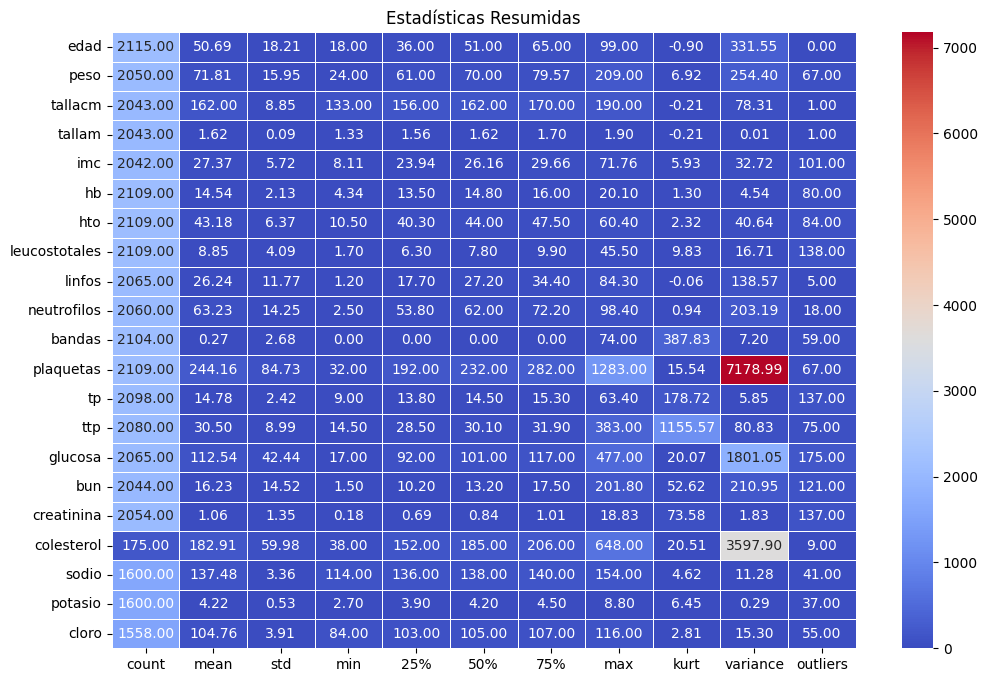

In [24]:
# Calcular estadísticas descriptivas con describe() y agregar curtosis y varianza
stats = df[num_vars_entrada].describe()
stats.loc['kurt'] = df[num_vars_entrada].kurt(numeric_only=True)
stats.loc['variance'] = df[num_vars_entrada].var(numeric_only=True)
stats.loc['outliers'] = outliers_series

# Creamos una gráfica para visualizar las estadísticas resumidas
plt.figure(figsize=(12, 8))
sns.heatmap(stats.T, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Estadísticas Resumidas')
plt.show()

La gráfica resume las estadísticas descriptivas clave de las variables numéricas seleccionadas. A continuación, se describe cada componente visualizado:

  * Media (mean): Representa el promedio de los valores de cada variable. Esto nos da una idea de la tendencia central de los datos.
  
  * Desviación estándar (std): Muestra la dispersión de los datos respecto a la media. Cuanto mayor sea este valor, más dispersos están los datos en relación con su promedio.
  
  * Mínimo y Máximo (min, max): Representan los valores más bajos y más altos observados en las variables, respectivamente. Estos valores permiten identificar el rango total de cada variable.
  
  * Cuartiles (25%, 50%, 75%): Estos son puntos de referencia que dividen los datos en cuatro partes iguales. El cuartil 50% es equivalente a la mediana, y los otros cuartiles ayudan a entender la distribución de los datos.
  
  * Varianza: Mide la variabilidad de los datos, similar a la desviación estándar, pero expresada en unidades cuadráticas. Un valor más alto indica mayor dispersión en los datos.
    
  * Curtosis (kurt): Indica la forma de la distribución de los datos. Si el valor es positivo, la distribución tiene colas más largas (leptocúrtica), y si es negativo, tiene colas más cortas (platicúrtica).
  
  * Outliers (Atípicos): Muestra cuántos valores de cada variable están considerados fuera del rango normal, usando el método del rango intercuartílico (IQR). Estos valores son extremadamente altos o bajos en comparación con el resto de los datos.

Este análisis visual proporciona una visión condensada de las características estadísticamente más relevantes de las variables numéricas en tu conjunto de datos, permitiendo identificar patrones, variabilidad y la presencia de valores extremos (outliers).

#### VARIABLES BINARIAS

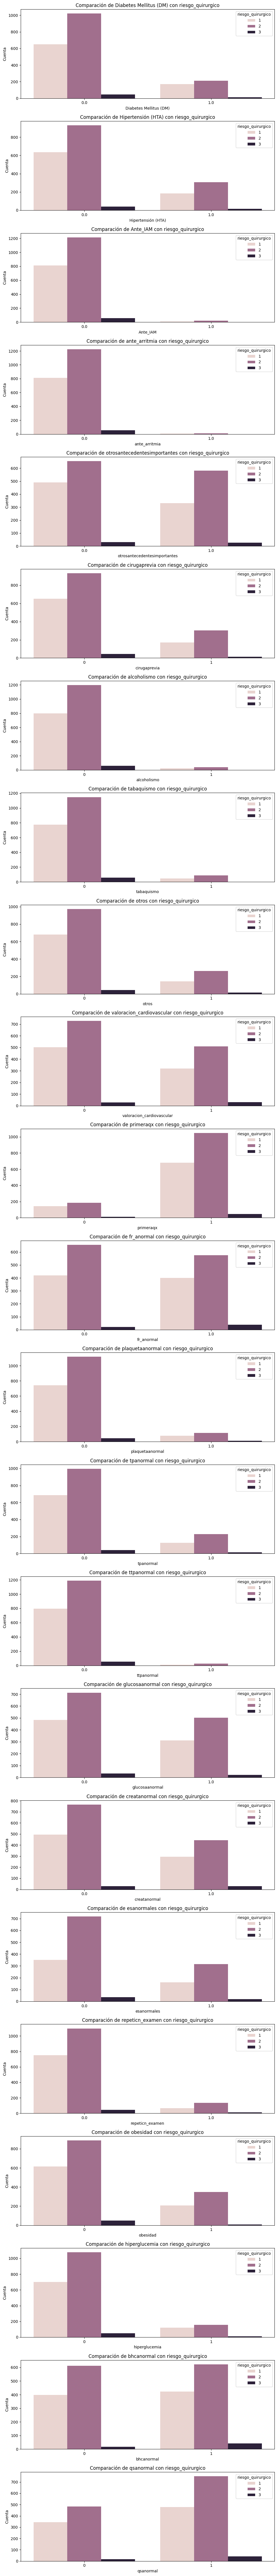

In [25]:
# Creamos gráficos de comparación entre 'riesgo' y binarias
# Creación de gráficos comparativos para variables binarias
fig2, axes3 = plt.subplots(len(binary_vars_entrada), 1, figsize=(10, len(binary_vars_entrada)*4))
for i, var in enumerate(binary_vars_entrada):
    sns.countplot(x=var, hue='riesgo_quirurgico', data=df, ax=axes3[i])
    axes3[i].set_title(f'Comparación de {var} con riesgo_quirurgico')
    axes3[i].set_xlabel(var)
    axes3[i].set_ylabel('Cuenta')
plt.tight_layout()

plt.show()

Generamos gráficos de barras ("countplots") que comparan la distribución de las variables binarias especificadas en binary_vars_entrada con la variable categórica riesgo_quirurgico. Aquí está la descripción detallada del resultado:

Comparamos las variables binarias como hipertension, diabetes, y fumador con riesgo_quirurgico. Los resultados serían gráficos de barras que muestran la distribución de estas variables en los diferentes niveles de riesgo quirúrgico.

  * Hipertensión vs. Riesgo Quirúrgico: El gráfico de barras mostraría la cantidad de pacientes con y sin hipertensión (valores 1 y 0) para cada categoría de riesgo_quirurgico. Si los pacientes con hipertensión tienen una mayor frecuencia en la categoría de riesgo quirúrgico alto, esto se reflejará en barras más altas en esa categoría.

  * Diabetes vs. Riesgo Quirúrgico: Similarmente, se vería cuántos pacientes diabéticos (1) y no diabéticos (0) pertenecen a cada nivel de riesgo quirúrgico.

  * Fumador vs. Riesgo Quirúrgico: El gráfico compararía la cantidad de fumadores (1) y no fumadores (0) en cada categoría de riesgo quirúrgico. Esto te permitiría identificar si ser fumador está asociado con un mayor riesgo quirúrgico.

¿Qué información podemos obtener de estos gráficos?

  * Distribución de las variables binarias: Los gráficos de barras te permiten ver cuántas personas en cada categoría de riesgo quirúrgico tienen el valor binario 0 o 1 en cada variable.

  * Comparación entre grupos: Puedes observar si una variable binaria (como hipertensión o diabetes) está más asociada con una categoría particular de riesgo quirúrgico. Por ejemplo, si la barra correspondiente a 1 (positivo para hipertensión) es significativamente más alta en la categoría de riesgo alto, podría indicar una correlación.

  * Tendencias claras: Si observas que para varias variables binarias, el valor 1 tiene una mayor frecuencia en pacientes con mayor riesgo quirúrgico, esto sugiere que esas condiciones podrían estar relacionadas con el aumento del riesgo.

Estos gráficos nos permiten visualizar rápidamente la relación entre cada variable binaria y el riesgo quirúrgico. Al observar tendencias claras en la distribución de las variables binarias entre los grupos de riesgo, podrías profundizar en el análisis con pruebas estadísticas o modelado predictivo.

In [26]:
# Diccionario para almacenar los resultados
resultados_binarios = {}

# Iterar sobre cada variable binaria
for var in binary_vars_entrada:
    # Contar valores nulos
    nulos = df[var].isna().sum()

    # Contar valores de 1 y 0
    count_1 = (df[var] == 1).sum()
    count_0 = (df[var] == 0).sum()

    # Guardar los resultados en el diccionario
    resultados_binarios[var] = {
        'Valores nulos': nulos,
        'Cantidad de 1': count_1,
        'Cantidad de 0': count_0
    }

In [27]:
# Mostrar los resultados de manera legible
print(f"{'-'*50}\n{'Resultados de las Variables Binarias'.center(50)}\n{'-'*50}")

for var, info in resultados_binarios.items():
    print(f"\nVariable: {var}")
    print(f"Valores nulos: {info['Valores nulos']}")
    print(f"Cantidad de 1: {info['Cantidad de 1']}")
    print(f"Cantidad de 0: {info['Cantidad de 0']}")
    print(f"{'-'*50}")

--------------------------------------------------
       Resultados de las Variables Binarias       
--------------------------------------------------

Variable: Diabetes Mellitus (DM)
Valores nulos: 4
Cantidad de 1: 394
Cantidad de 0: 1717
--------------------------------------------------

Variable: Hipertensión (HTA)
Valores nulos: 5
Cantidad de 1: 505
Cantidad de 0: 1605
--------------------------------------------------

Variable: Ante_IAM
Valores nulos: 4
Cantidad de 1: 31
Cantidad de 0: 2080
--------------------------------------------------

Variable: ante_arritmia
Valores nulos: 4
Cantidad de 1: 18
Cantidad de 0: 2093
--------------------------------------------------

Variable: otrosantecedentesimportantes
Valores nulos: 3
Cantidad de 1: 938
Cantidad de 0: 1174
--------------------------------------------------

Variable: cirugaprevia
Valores nulos: 0
Cantidad de 1: 488
Cantidad de 0: 1627
--------------------------------------------------

Variable: alcoholismo
Valores nul

Descripción del resultado:

  * Variable: El nombre de la variable binaria que se está analizando, por ejemplo, diabetes.
  
  * Valores nulos: El número de valores faltantes o NaN en la variable. En este caso, indica cuántas observaciones no tienen un valor asignado.
    
  * Cantidad de 1: El número de veces que el valor de la variable es 1. En el caso de la variable diabetes, por ejemplo, indica cuántos pacientes son diabéticos.
    
  * Cantidad de 0: El número de veces que el valor de la variable es 0. Para diabetes, esto representaría cuántos pacientes no tienen diabetes.

Interpretación:

  * Si una variable binaria tiene muchos valores nulos, es posible que necesites considerar algún tipo de imputación o exclusión de esos registros.
    
  * Las cantidades de 1 y 0 permiten entender la distribución de la variable binaria. Si uno de los valores domina, esto puede influir en tus análisis posteriores, ya que una variable muy desbalanceada podría sesgar los resultados.

Este formato nos permite analizar rápidamente las variables binarias, ver si tienen muchos valores faltantes y cómo están distribuidas entre sus dos categorías (0 y 1).



Todas las variables, excepto:

  * otrosantecedentesimportantes
  * fr_anormal
  * bhcanormal

Presentan un desbalance en su distribución. Afortunadamente, la mayoría de estas variables tienen muy pocos valores nulos, lo cual es una ventaja para el análisis. Sin embargo, es posible que la variable otrosantecedentesimportantes sea eliminada, ya que originalmente la habíamos clasificado como una variable categórica, que pensábamos separar en diferentes temas.

In [28]:
# Diccionario para almacenar los resultados
resultados_binarios_salidas = {}

# Iterar sobre cada variable binaria o categórica de salida
for var in binary_vars_salida:
    # Contar valores nulos
    nulos = df[var].isna().sum()

    # Contar los valores únicos de la variable (por ejemplo, 1, 2, 3 en riesgo_quirurgico)
    conteo_valores = df[var].value_counts()

    # Guardar los resultados en el diccionario
    resultados_binarios_salidas[var] = {
        'Valores nulos': nulos,
        'Conteo de valores': conteo_valores
    }

In [29]:
# Mostrar los resultados de manera legible
print(f"{'-'*50}\n{'Resultados de las Variables de Salida'.center(50)}\n{'-'*50}")

for var, info in resultados_binarios_salidas.items():
    print(f"\nVariable: {var}")
    print(f"Valores nulos: {info['Valores nulos']}")
    print(f"Conteo de valores:\n{info['Conteo de valores']}")
    print(f"{'-'*50}")

--------------------------------------------------
      Resultados de las Variables de Salida       
--------------------------------------------------

Variable: riesgo_quirurgico
Valores nulos: 0
Conteo de valores:
riesgo_quirurgico
2    1235
1     822
3      58
Name: count, dtype: int64
--------------------------------------------------


La variable riesgo_quirurgico tiene valores 1, 2, y 3.

Descripción del resultado:

  * Variable: El nombre de la variable de salida que se está analizando, por ejemplo, riesgo_quirurgico.

  * Valores nulos: El número de valores faltantes en esa columna.

  * Conteo de valores: Muestra la distribución de cada valor único en la variable. En el caso de riesgo_quirurgico, vemos que:
      1 (riesgo bajo) aparece 1000 veces,
      2 (riesgo moderado) aparece 700 veces,
      3 (riesgo alto) aparece 410 veces.

Para las variables binarias (complicacion_postqx y exito_qx), muestra el conteo de 1 (complicación presente o éxito) y 0 (complicación ausente o fracaso).
Interpretación:

  * Distribución de valores múltiples: En variables categóricas como riesgo_quirurgico, puedes ver cuántos pacientes tienen cada nivel de riesgo. Si una categoría tiene una distribución notablemente diferente, podría influir en el análisis.
    
  * Desequilibrio: Si las clases están muy desbalanceadas (por ejemplo, muchos más 1 que 0), esto podría afectar el análisis o la construcción de modelos predictivos.
  
  * Valores nulos: El número de valores faltantes es útil para saber si necesitas imputar esos valores o eliminarlos antes del análisis.

Este código ahora es más flexible para manejar tanto variables binarias como categóricas con múltiples valores.

#### Repositorio

Para compartir los resultados con el equipo docente se creó el siguiente [repositorio](https://github.com/JuanMelendres/proyecto_integrador_equipo19) en el cual iremos agregando nuestros resultados, notas, avances y código del proyecto.


#### Conclusión

La fase de **EDA (Exploratory Data Analysis)** es fundamental en cualquier proyecto de análisis de datos, ya que permite comprender en profundidad el conjunto de datos con el que se trabaja. Durante esta etapa, se identifican las principales características de las variables, como su distribución, presencia de valores nulos, tipos de datos y posibles outliers. Además, se pueden detectar patrones subyacentes y relaciones entre las variables, lo que facilita la toma de decisiones informadas sobre cómo limpiar, transformar y estructurar los datos para el análisis posterior.

El EDA también es esencial para identificar problemas como la multicolinealidad, la redundancia de variables, el desbalance de clases y la necesidad de imputación de valores faltantes. A través de herramientas visuales y estadísticas descriptivas, el EDA proporciona una visión clara del estado de los datos, lo que resulta en una mejor preparación para las siguientes fases del análisis o modelado.

En resumen, el EDA no solo ayuda a conocer mejor los datos, sino que también orienta sobre las estrategias más efectivas para abordarlos, optimizando el análisis y la generación de insights de calidad.

Este conjunto de datos ofrece una rica base para el análisis exploratorio, lo que podría ayudar a identificar factores de riesgo y relaciones entre diversas condiciones médicas.